## Módulo 2 Unidad 4: Práctica 6 - Árboles de decisión.

### 1. Descripción del conjunto de datos.

El conjunto de datos Iris de sklearn es un dataset sobre las 3 especies de flor Iris. Presenta las siguientes características:
- Tamaño: 150 muestras (50 por clase).
- Clases: 3 especies de flores Iris.
    - 0: Iris setosa
    - 1: Iris versicolor
    - 2: Iris virginica
- Características o variables predictoras: 4 atributos numéricos representado en centímetros.
    - sepal length (longitud del sépalo).
    - sepal width (ancho del sépalo).
    - petal length (longitud del pétalo).
    - petal width (ancho del pétalo).

Para un mejor análisis previo del conjunto de datos vamos a convertirlo a un dataframe de Pandas.

In [2]:
# Importamos las librerías necesarias
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Cargamos el dataset
iris = load_iris()

# Creamos un DataFrame con las características
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Añadimos la columna de la especie (target)
df['species'] = iris.target

# Mostramos dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df.info() # Analizamos la información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.nunique() # Análisis de valores únicos

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

In [8]:
df.describe() # Mostramos las variables numéricas (todas son numéricas)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.isna().sum() # análisis de nulos

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

**Conclusión:** vemos que se trata de un dataframe con 150 registros todos numéricos y en el que no existe ningún nulo. Tenemos cuatro variables tipo float ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'), que serán nuestras variables predictoras, y tenemos una variable tipo entero 'species', que será nuestra variable objetivo.

En cuanto al escalado, vemos que nuestro dataset no lo está, ya que son datos en crudo, es decir, son medidas reales en cm de las características de las hojas, aunque el rango es pequeño entre para las distintas características:
- sepal length: [4.30, 7.90]
- sepal width: [2.00, 4.40]
- petal lenght: [1.00, 6.90]
- petal width: [0.10, 2.50]

Los modelos que vamos a utilizar, Decision Tree y Random Forest, no son sensibles a la escala de datos, por lo que no será necesario escalar o normalizar nuestros datos.

### 2. Árboles de decisión.
1. Importar librerías y datos (dataset iris).
2. Dividir el conjunto de datos en entrenamiento y prueba.
3. Crear y ajustar el modelo de árbol de decisión.
4. Visualizar el árbol de decisión.
5. Evaluar el modelo utilizando la matriz de confusión y el informe de clasificación valorando diferentes profundidades máximas.

In [14]:
# 1. Importar librerías y datos (dataset iris).
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Obtenemos las variables predictoras y la variable objetivo
X = iris.data
y = iris.target

Ya que no vamos a hacer modificaciones en el conjunto de datos, vamos a trabajar directamente con el objeto 'Bunch' devuelto tras cargar el conjunto de datos, en lugar de con un dataframe de Pandas. Un 'Bunch' es una estructura de datos específica de scikit-learn similar a un diccionario, pero con atributos accesibles tanto por clave como por notación de punto. El 'Bunch' organiza los datos en arrays de NumPy y en listas, siendo ideal para entrenar modelos.

In [17]:
# Comprobación del tipo de dato de nuestro conjunto iris
print('Tipo del conjunto de datos iris de sklearn:', type(iris))
print(iris) # Mostramos el contenido de nuestro cojunto de datos

Tipo del conjunto de datos iris de sklearn: <class 'sklearn.utils._bunch.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4

En la salida que obtenemos de la celda anterior podemos ver la estructura del Bunch.

Los componentes principales son los siguientes:
- iris.data: matriz Numpy de dos dimensiones
- iris.target: vector Numpy de una dimensión
- iris.feature_names: nombre de las características (columnas) de iris.data
- iris.target_names: nombre de las clases de nuestra variable objetivo

In [20]:
# Comprobamos lo descrito anteriormente
print('Tipo de datos para la clave data: {} / Forma {}'.format(type(iris.data), iris.data.shape))
print('Tipo de datos para la clave target: {} / Forma {}'.format(type(iris.target), iris.target.shape))
print('Columnas de iris.data:', iris.feature_names)
print('Clases de la variable objetivo iris.target:', iris.target_names)

Tipo de datos para la clave data: <class 'numpy.ndarray'> / Forma (150, 4)
Tipo de datos para la clave target: <class 'numpy.ndarray'> / Forma (150,)
Columnas de iris.data: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases de la variable objetivo iris.target: ['setosa' 'versicolor' 'virginica']


In [22]:
# 2. Dividir el conjunto de datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 3. Crear y ajustar el modelo de árbol de decisión.
model = DecisionTreeClassifier() # Creamos un modelo de Árbol de Decisión
model.fit(X_train, y_train) # Entrenamos el modelo

DecisionTreeClassifier()

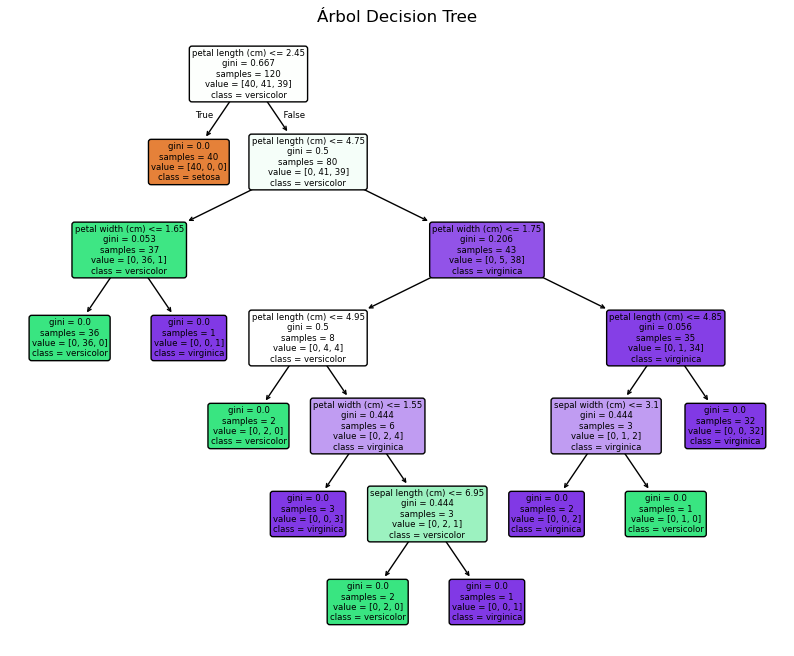

In [26]:
# 4. Visualizar el árbol de decisión.
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title(f"Árbol Decision Tree")
plt.show()

**Conclusión:** en el gráfico anterior podemos visualizar el recorrido del árbol generado por nuestro modelo y la toma de decisiones en base a distintas variables. Si estudiamos el árbol, vemos que el nodo raíz toma como condición 'petal length (cm) <=2.45' y dependiendo de esta irá por el hijo de la izquierda o de la derecha. También vemos que el número total de muestras ('samples') de este nodo, y vemos que usa las 120 muestras de entrenamiento (el 80% del total de las muestras del dataset). Además, vemos que el índice Gini es de 0.667. Este viene definido por la siguiente fórmula:

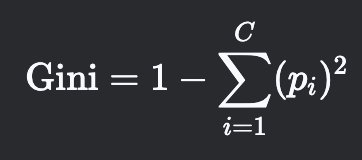

donde 'C' es el número de clases (en nuestro caso 3) y 'p' es la proporción de muestras de la clase 'i'. La impureza será máxima cuando las muestras están equitativamente distribuidas entre las 3 clases, es decir, 1/3 para cada una de ellas. El 'Gini' máximo aplicando esto será de 0.667. En el nodo raíz, vemos también las proporciones de las muestras con 'value', con valores de 40, 31 y 39 sobre el total de 120 muestras, y 'class' que representa la clase mayoritaria del nodo. Dado el Gini obtenido para esta proporción es de 0.667 (prácticamente el máximo teórico), nos indica que el nodo es altamente impuro porque las clases están casi equilibradas. Esto justifica que el árbol necesita ser dividido.

Como es lógico, nuestro dataset es difícil de separar inicialmente, pero esto se va clarificando a medida que descendemos por los nodos hijos. Si bajamos al siguiente nivel, el nodo hijo de la izquierda es una hoja pura, ya que cualquier muestra con 'petal length <= 2.45' (condición heredada del nodo padre) se clasifica como setosa sin necesidad de más divisiones. Vemos que el índice Gini es del 0.0, es decir, pureza perfecta, ya que todas las muestras son de la misma clase. Si miramos el nodo hijo de la derecha, el árbol continua con la condición de 'petal length > 2.45 heredada del nodo padre, pero también tiene que ser <= 4.75. Vemos un índice Gini de 0.5, lo que indica una impureza elevada, teniendo las proporciones de las muestras en 41 para versicolor y 39 para virginica, con setosas excluidas ya que 'petal length es > 2.6. Al no ser este nodo puro, el arbol tendrá que seguir siendo dividido, y así se continúa bajando de nivel y dividiendo en distintas hojas.

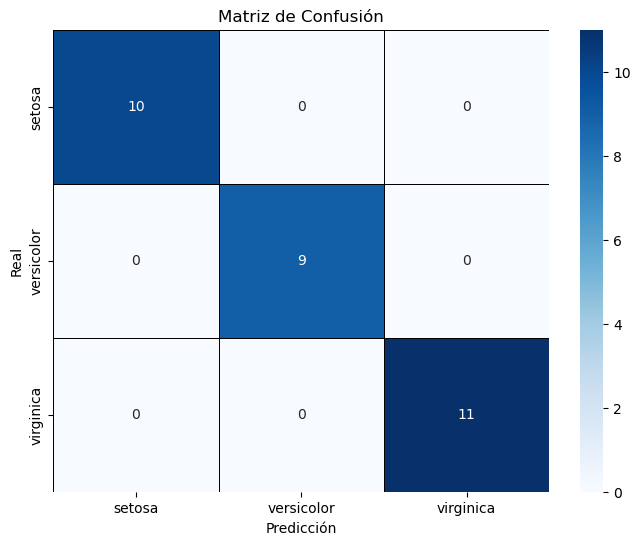

In [29]:
# 5. Evaluar el modelo utilizando la matriz de confusión y el informe de clasificación valorando diferentes profundidades máximas.
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Realizamos las predicciones para el conjunto de preubas
y_pred = model.predict(X_test)

# Generamos la Matriz de Confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', linecolor='black',linewidths=0.7,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [31]:
# Generamos el Informe de Clasificación
informe_clasificacion = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Informe de Clasificación:\n', informe_clasificacion)

Informe de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Conclusiones:** del resultado de la matriz de confusión vemos que el modelo no cometió ningún error en el conjunto de prueba y clasificó perfectamente todas las muestras en sus categorías correctas. Del informe de clasificaicón podemos corroborar la misma conclusión, ya que se observa que el modelo tiene un rendimiento perfecto y todas las clases se predicen con igual precisión.

Ahora, vamos a comprobar nuestro modelo valorando diferentes profundidades máximas y analizar sus resultados. Al no haberle especificado la profundidad máxima a nuestro modelo ha crecido hasta que todas las hojas son puras, como podemos ver la visualización del árbol vista anteriormente. Vimos que teníamos un total de 6 niveles. De todas formas lo podemos comprobar de la siguiente manera:

In [35]:
# Comprobamos la profundida del árbol de nuestro modelo actual
profundidad_real = model.tree_.max_depth
print('Profundidad real del árbol: ', profundidad_real)

Profundidad real del árbol:  6


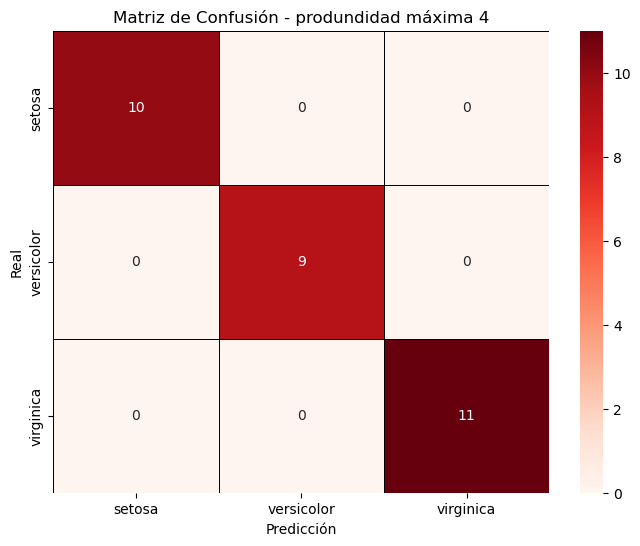

In [37]:
# Vamos a analizar un nuevo modelo con un máximo de profundidad de 4
model_depth_4 = DecisionTreeClassifier(random_state=42, max_depth=4)
model_depth_4.fit(X_train, y_train)

# Realizamos las predicciones para el conjunto de preubas
y_pred_d4 = model_depth_4.predict(X_test)

# Generamos la Matriz de Confusión
matriz_confusion_d4 = confusion_matrix(y_test, y_pred_d4)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_d4, annot=True, fmt='d', cmap='Reds', linecolor='black',linewidths=0.7,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - produndidad máxima 4')
plt.show()

In [39]:
# Generamos el Informe de Clasificación para una profundidad máximo de 4
informe_clasificacion_p4 = classification_report(y_test, y_pred_d4, target_names=iris.target_names)
print('Informe de Clasificación con profundidad máximo 4:\n', informe_clasificacion_p4)

Informe de Clasificación con profundidad máximo 4:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



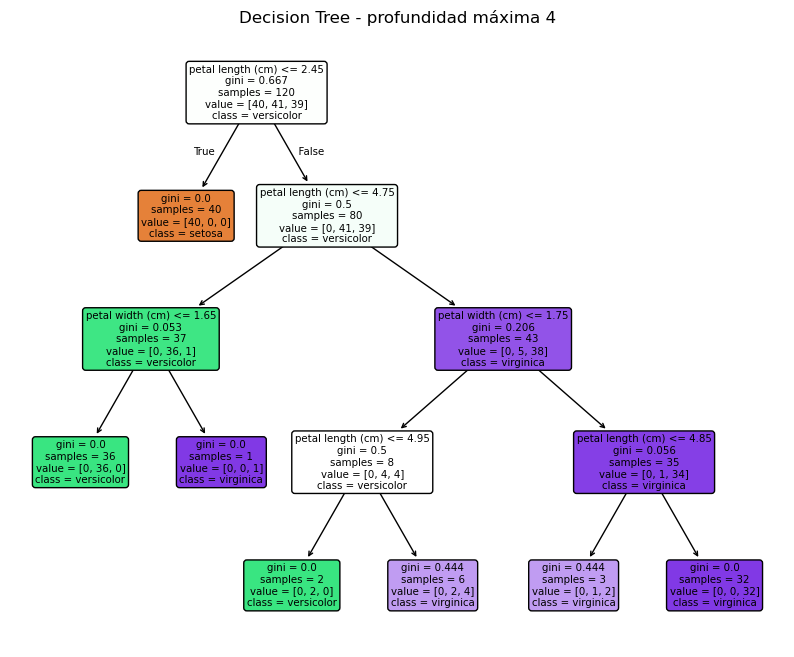

In [41]:
# 4. Visualizar el árbol de decisión para una profundidad máximo de 4.
plt.figure(figsize=(10, 8))
plot_tree(model_depth_4, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree - profundidad máxima 4')
plt.show()

**Conclusiones:** jugando con las profundidades, vemos que a pesar de limitar la profundidad máxima a 4, vemos que no empeoramos el rendimiento del modelo, ya que obtenemos un 100% de aciertos a pesar de tener algunas hojas con una impureza elevada.

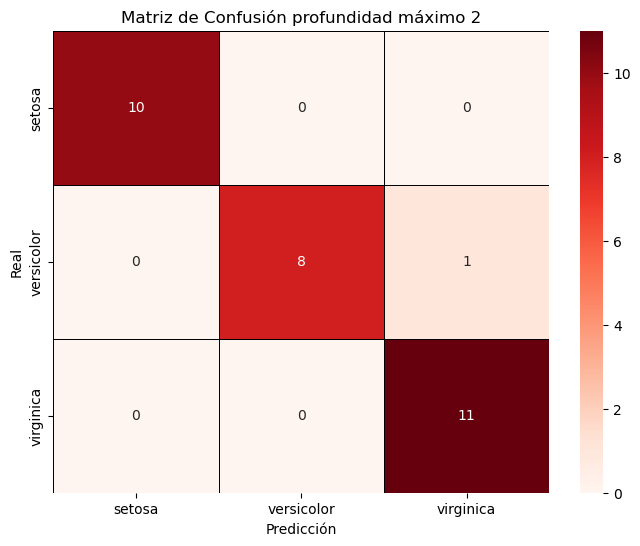

In [44]:
# Vamos a analizar un nuevo modelo con un máximo de profundidad de 2
model_depth_2 = DecisionTreeClassifier(random_state=42, max_depth=2)
model_depth_2.fit(X_train, y_train)

# Realizamos las predicciones para el conjunto de preubas
y_pred_d2 = model_depth_2.predict(X_test)

# Generamos la Matriz de Confusión
matriz_confusion_d2 = confusion_matrix(y_test, y_pred_d2)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_d2, annot=True, fmt='d', cmap='Reds', linecolor='black',linewidths=0.7,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión profundidad máximo 2')
plt.show()

In [46]:
# Generamos el Informe de Clasificación con profundidad máxima 2
informe_clasificacion_p2 = classification_report(y_test, y_pred_d2, target_names=iris.target_names)
print('Informe de Clasificación con profundidad máxima 2:\n', informe_clasificacion_p2)

Informe de Clasificación con profundidad máxima 2:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



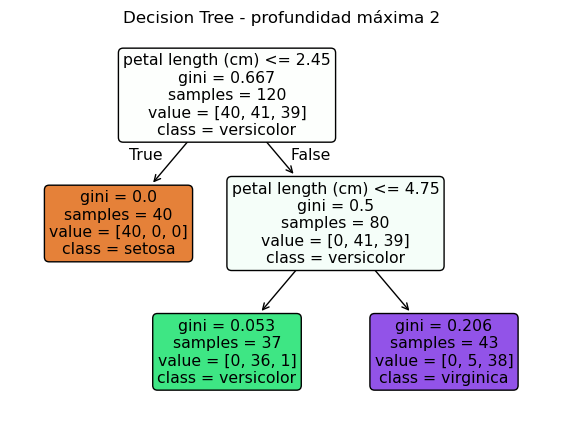

In [48]:
# 4. Visualizar el árbol de decisión para una profundidad máximo de 2.
plt.figure(figsize=(7, 5))
plot_tree(model_depth_2, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree - profundidad máxima 2')
plt.show()

**Conclusiones:** jugando con las profundidades, vemos que reduciendo a tan sólo 2 niveles de profundidad, según la matriz de confusión vemos que comete un error a la hora de clasificar una muestra de clase 'versicolor' como 'virginica', pero el seguimos obteniendo un gran resultado a pesar de reducir a tan solo dos niveles de profundidad, ganando tiempo de procesado. Tenemos un accuracy del 97% de acierto global, que tiendo las clases bastante equilibradas (10, 9, 11) puede ser un métrica confiable. Tenemos un F1-score del 100% para setosa, mientras que del 94% para versicolor y 96% par virgínica, debido al error comentado anteriormente. Seguimos teniendo un resultado excelente, aunque aumentando la profundidad a 3 o 4 podemos obtener el 100% de aciertos.

### 3. Bosques Aleatorios.
1. Aplicar el modelo para hacer predicciones sobre el cojunto de prueba.
2. Evaluar el modelo y comparar los resultados con el anterior.
3. Analizar la importancia de las características usando la importancia de características y/o la importancia por permutación.

In [52]:
# 1. Aplicar el modelo para hacer predicciones sobre el conjunto de prueba.
# Importamos las librerías necesarias
from sklearn.ensemble import RandomForestClassifier

# Creamos y ajustamos el modelo de árbol de decisión.
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42) # Creamos un modelo de Random Forest
model_random_forest.fit(X_train, y_train) # Entrenamos el modelo

RandomForestClassifier(random_state=42)

In [54]:
# Realizamos las predicciones para el conjunto de pruebas
y_pred_rf = model_random_forest.predict(X_test)

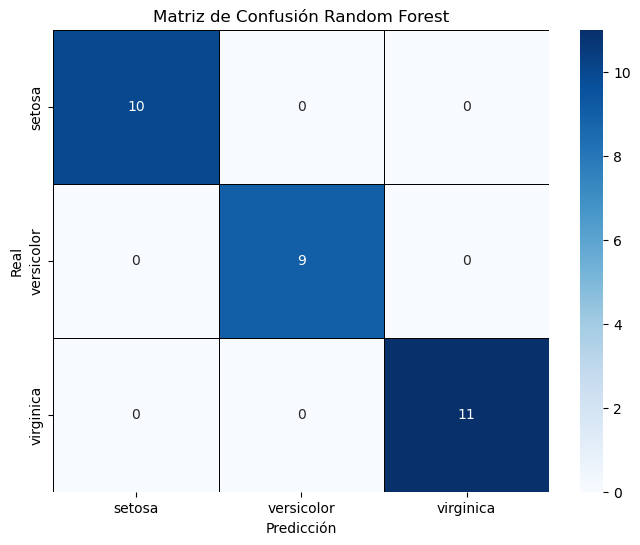

In [56]:
# 2. Evaluar el modelo y comparar los resultados con el anterior.

# Generamos la Matriz de Confusión
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', linecolor='black',linewidths=0.7,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Random Forest')
plt.show()

In [58]:
# Generamos el Informe de Clasificación
informe_clasificacion_rf = classification_report(y_test, y_pred_rf, target_names=iris.target_names)
print('Informe de Clasificación Random Forest:\n', informe_clasificacion_rf)

Informe de Clasificación Random Forest:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Conclusiones:** vemos que el resultado obtenido es igual que el obtenido con le modelo Decision Tree. El modelo no cometió ningún error en el conjunto de prueba y clasificó perfectamente todas las muestras en sus categorías correctas según la matriz de confusión. Del informe de clasificación podemos corroborar la misma conclusión, ya que se observa que el modelo tiene un rendimiento perfecto y todas las clases se predicen con igual precisión.

Al igual que con Decision Tree, también podemos comprobar nuestro modelo valorando diferentes profundidades máximas, y en el caso de Random Forest, el número de árboles. Nuestra modelo actual tiene un total de 100 árboles y la siguiente profundidad máxima:

In [62]:
# Analizamos las profundidades de nuestro modelo ya entrenado anteriormente con 100 árboles
depths = [tree.tree_.max_depth for tree in model_random_forest.estimators_]
print('Profundidades de los árboles individuales:\n', depths)
print('Profundidad máxima en el bosque:', max(depths))

Profundidades de los árboles individuales:
 [7, 4, 6, 5, 5, 5, 6, 5, 4, 6, 6, 5, 5, 7, 5, 7, 7, 5, 6, 5, 5, 4, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 7, 9, 5, 5, 5, 6, 4, 9, 8, 4, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 6, 4, 6, 6, 5, 5, 4, 4, 4, 5, 6, 4, 6, 6, 6, 4, 4, 6, 5, 6, 5, 6, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 7, 6, 4, 4, 4, 5, 5, 6, 6, 5]
Profundidad máxima en el bosque: 9


Podemos visualizar algunos árboles, por ejemplo, los 3 primeros:

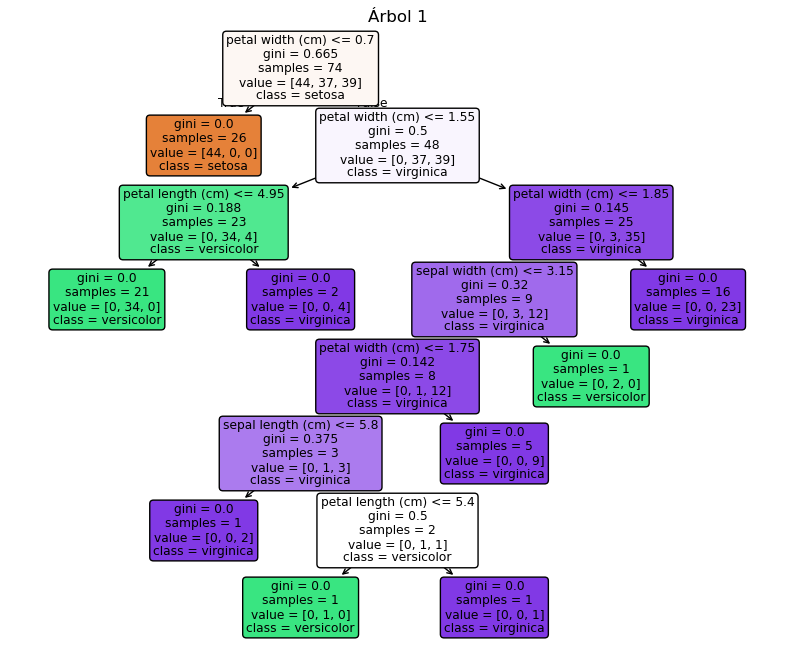

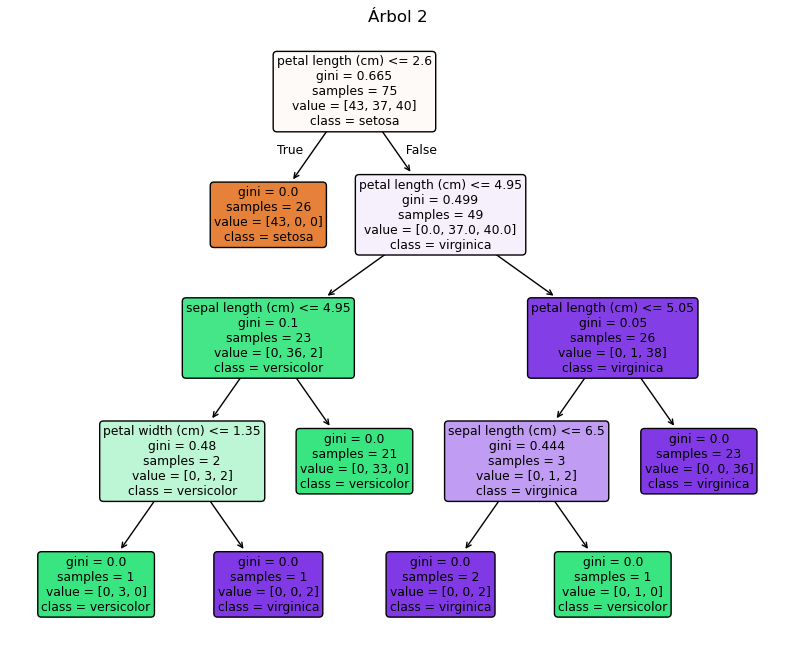

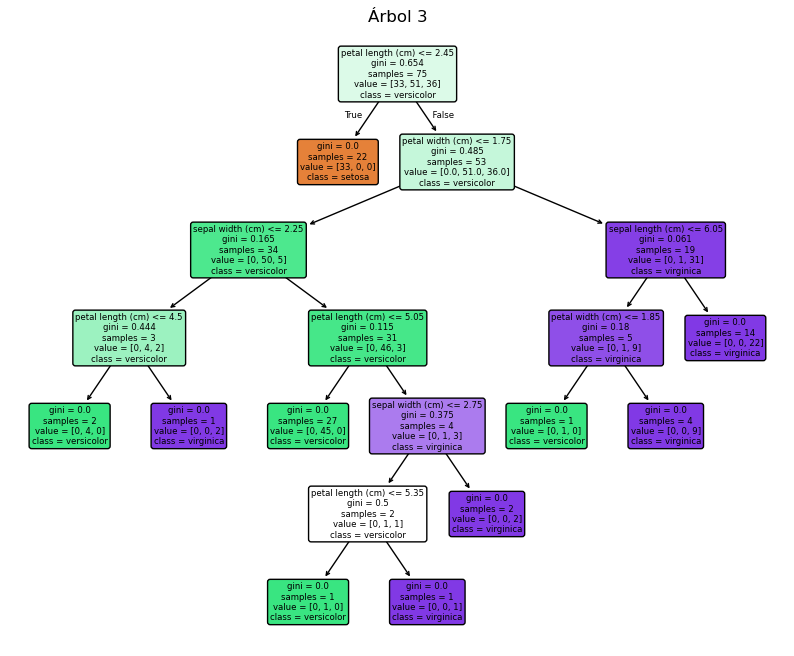

In [65]:
# Visualizar el árboles Random Forest.
n_trees_to_plot = 3 # vamos a visualizar 3 árboles
for i in range(n_trees_to_plot):
    plt.figure(figsize=(10, 8))
    plot_tree(model_random_forest.estimators_[i], feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
    plt.title(f"Árbol {i + 1}")
    plt.show()

**Conclusión:** en los gráficos anteriores podemos visualizar el recorrido de alguno de los árboles y la toma de decisiones en base a distintas condiciones dependiendo de árbol, utilizando distintas características de partida para el nodo raíz. Si estudiamos a modo de ejemplo el árbol 2, vemos que el nodo raíz toma como condición 'petal length (cm) <=2.6' y dependiendo de esta irá por el hijo de la izquierda o de la derecha. También vemos que el número total de muestras ('samples') de este nodo, que son 75, ya que Random Forest entrena cada árbol con un subcojunto aleatorio de datos (no usa las 120 muestras completas del 80% de la división de nuestro dataset para entrenarlo). Además, vemos que el índice Gini es de 0.665.

En el nodo raíz, vemos también las proporciones de las muestras con 'value', con valores de 43, 37 y 40 sobre el total de 75 muestras, y 'class' que representa la clase mayoritaria del nodo. Dado el Gini obtenido para esta proporción es de 0.665 (muy próximo al máximo teórico de 0.667 para 3 clases), nos indica que el nodo es altamente impuro porque las clases están casi equilibradas. Esto justifica que el árbol necesita ser dividido.

Como vemos, a diferencia de Decision Tree, Random Forest utiliza múltiples árboles y distintas condiciones, y trabaja con subconjunto de muestras.

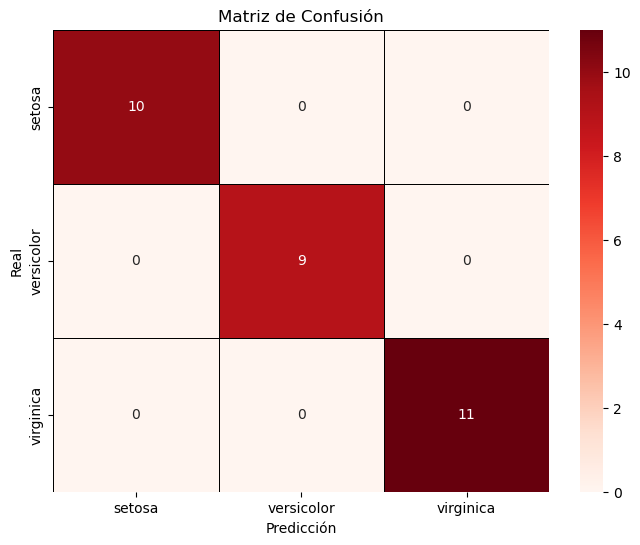

In [71]:
# Vamos a analizar un nuevo modelo Random Forest con un máximo de profundidad de 3 y 10 árboles
model_rf_depth_3 = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=3)
model_rf_depth_3.fit(X_train, y_train)

# Realizamos las predicciones para el conjunto de preubas
y_pred_rf_d3 = model_rf_depth_3.predict(X_test)

# Generamos la Matriz de Confusión
matriz_confusion_rf_d3 = confusion_matrix(y_test, y_pred_rf_d3)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf_d3, annot=True, fmt='d', cmap='Reds', linecolor='black',linewidths=0.7,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

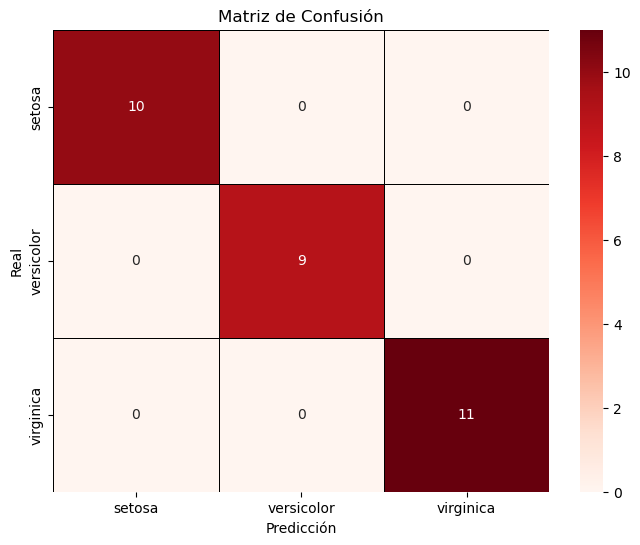

In [73]:
# Vamos a analizar un nuevo modelo con un máximo de profundidad de 2 y 3 árboles
model_rf_depth_2 = RandomForestClassifier(n_estimators=3, random_state=42, max_depth=2)
model_rf_depth_2.fit(X_train, y_train)

# Realizamos las predicciones para el conjunto de preubas
y_pred_rf_d2 = model_rf_depth_2.predict(X_test)

# Generamos la Matriz de Confusión
matriz_confusion_rf_d2 = confusion_matrix(y_test, y_pred_rf_d2)

# Visualizar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf_d2, annot=True, fmt='d', cmap='Reds', linecolor='black',linewidths=0.7,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

**Conclusiones:** en Random Forest podemos jugar con el número de árboles a utilizar y la profundidad de los mismos. Dependiendo de nuestro dataset, podemos reducir la carga computacional del modelo sin repercutir en los resultados del mismo, pero esto dependerá mucho de las características de nuestro dataset.

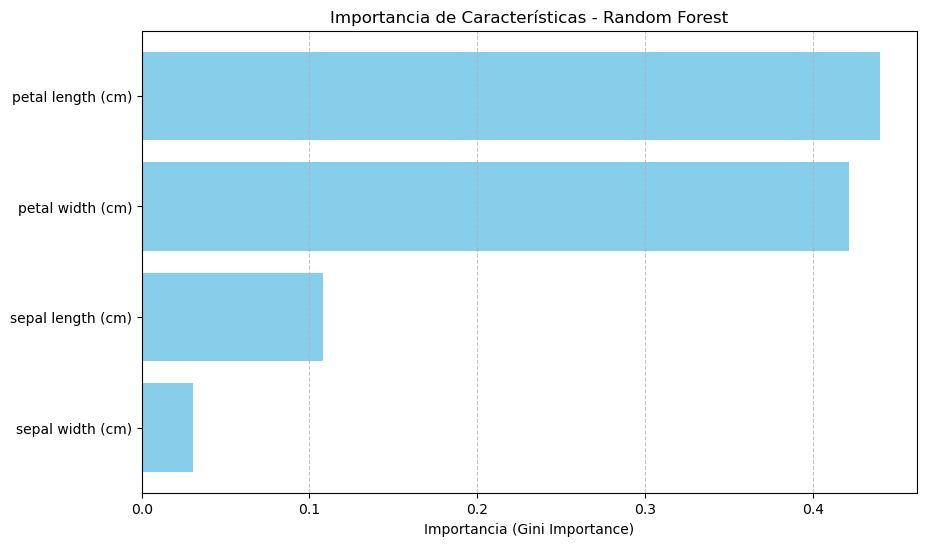

In [76]:
# 3. Analizar la importancia de las características usando la importancia de características y/o la importancia por permutación.
import numpy as np

# Obtenemos importancia de características
feature_importance = model_random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)  # Ordenamos características para mejor visualización

# Visualizamos características
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(feature_importance)), np.array(iris.feature_names)[sorted_idx])
plt.xlabel('Importancia (Gini Importance)')
plt.title('Importancia de Características - Random Forest')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Conclusiones:** la métrica 'Feature Importances' nos da la importancia de las características en base la reducción media de impureza (el índice Gini) que cada característica aporta a los árboles. En nuestro caso particular, en el dataset de Iris, 'petal lenght' y 'petal width' son las más importantes. Como vimos anteriormente analizando los árboles, la clase 'setosa' es muy fácil de separar por el tamaño de pétalo.

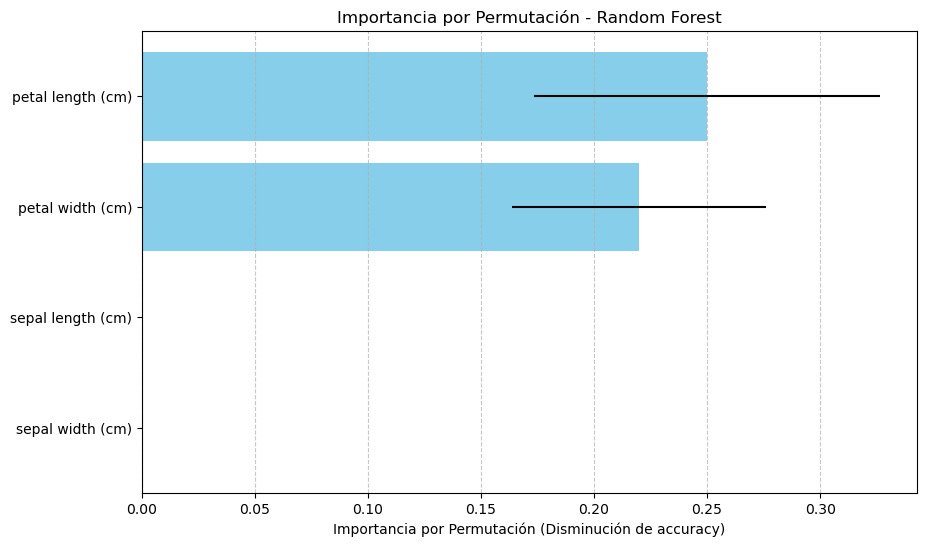

In [78]:
from sklearn.inspection import permutation_importance

# Calculamos importancia por permutación
result = permutation_importance(model_random_forest, X_test, y_test, n_repeats=10, random_state=42)

# Visualizamos los resultados ordenados por importancia
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), result.importances_mean[sorted_idx], align='center', color='skyblue', xerr=result.importances_std[sorted_idx])
plt.yticks(range(len(feature_importance)), np.array(iris.feature_names)[sorted_idx])
plt.xlabel('Importancia por Permutación (Disminución de accuracy)')
plt.title('Importancia por Permutación - Random Forest')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Conclusiones:**. la importancia por permutación es una técnica para evaluar la relevancia de cada característica en un modelo de machine learning, midiendo cuánto empeora el rendimiento del modelo cuando se rompe la relación entre esa característica y la variable objetivo. A diferencia de la importancia basada en impureza (Gini) como vimos con 'feature importances', este método funciona para cualquier algoritmo y no está sesgado por el tipo de característica, sea numérica o categórica. Analiza el cambio en el rendimiento del modelo para en caso de que este descienda, significa que la característica es importante para el modelo, y esto se realiza varias varias veces (en nuestro caso n_repeats lo hemos configurado a 10 repeteciones). De esta manera se mide el impacto real en el rendimiento y evitamos sesgos al no favorecer características numéricas.

Al igual que con 'Feature Importances', vemos que las caractacterístias más importantes son 'petal lenght' y 'petal_width'. Las líneas negras o barras de error en el gráfico representan la desviación estándar de las mediciones de importancia obtenidas durante las 10 permutaciones ejecutadas (n_repeats = 10). Vemos que para la variable 'petal lenght' la importancia osciló entre un rango mayor, apróximadamente entre 0.17 y 0.36, respecto a la variabilidad para 'petal widht' que ha sido menor.